# Continuous Methods

In [1]:
# imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [3]:
from pydataset import data

### Visualize:

### Ascombe's Quartet:

In [4]:
url = "https://gist.githubusercontent.com/ryanorsinger/6218f5731f3df7cb4771ff3879fdeaa3/raw/88cb6bed276e2236c33df011bd753b6c73832c30/quartet.csv"

df = pd.read_csv(url)

In [5]:
# peek at the head, what this data set looks like
df.head()

,id,dataset,x,y
0,0,I,10.0,8.04
1,1,I,8.0,6.95
2,2,I,13.0,7.58
3,3,I,9.0,8.81
4,4,I,11.0,8.33


In [14]:
# check out the stats with a .describe()
stats = df.groupby('dataset').describe()[['x','y']][list(itertools.product(['x','y'],['50%','mean']))]

In [15]:
type(stats)

pandas.core.frame.DataFrame

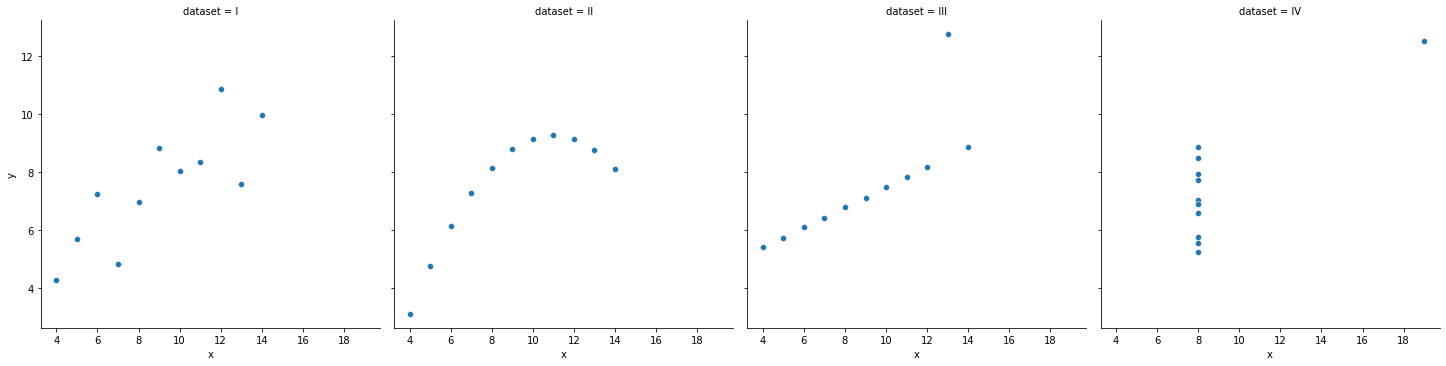

In [16]:
sns.relplot(x='x', y='y', col='dataset', data=df)

In [ ]:
# load up the swiss data set

In [17]:
df = data('swiss')

In [18]:
df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [19]:
# get the stats via describe

In [20]:
df.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [ ]:
# histograms

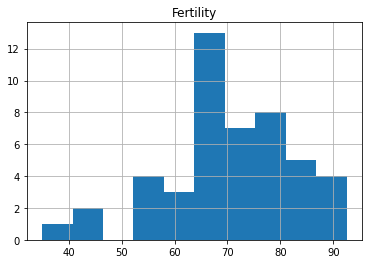

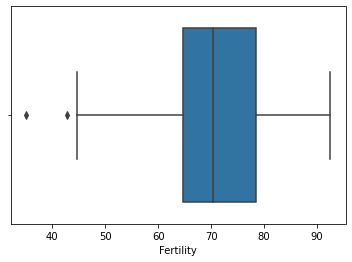

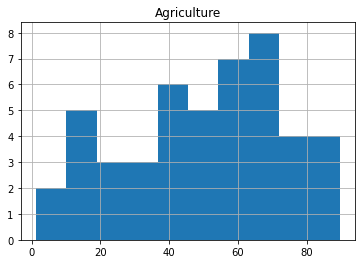

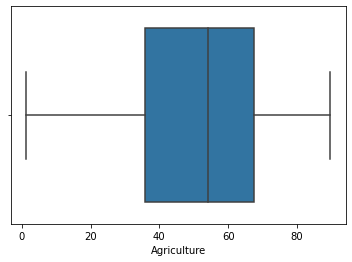

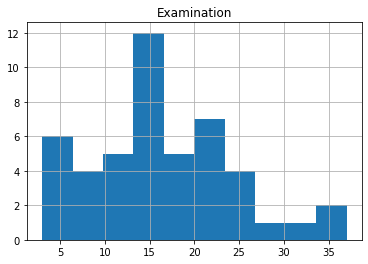

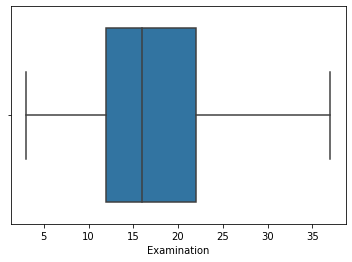

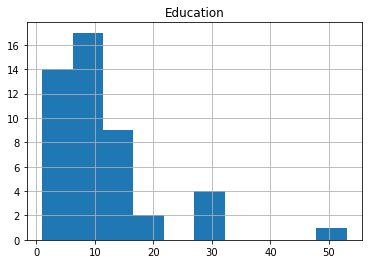

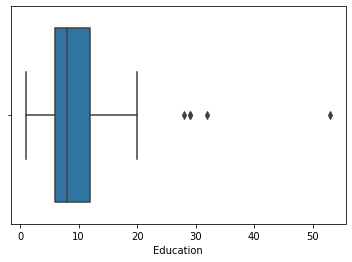

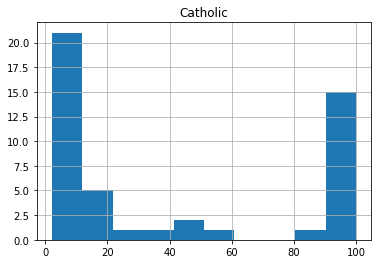

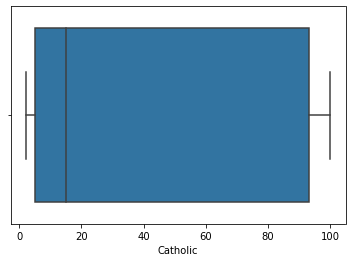

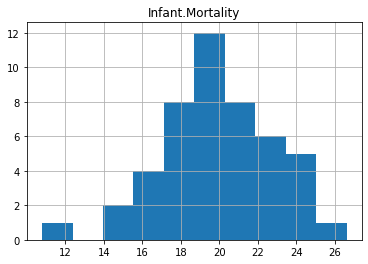

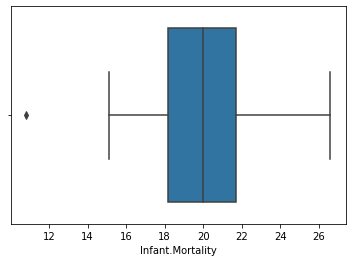

In [24]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        plt.title(col)
        plt.show()
        sns.boxplot(data=df, x=col)
        plt.show()

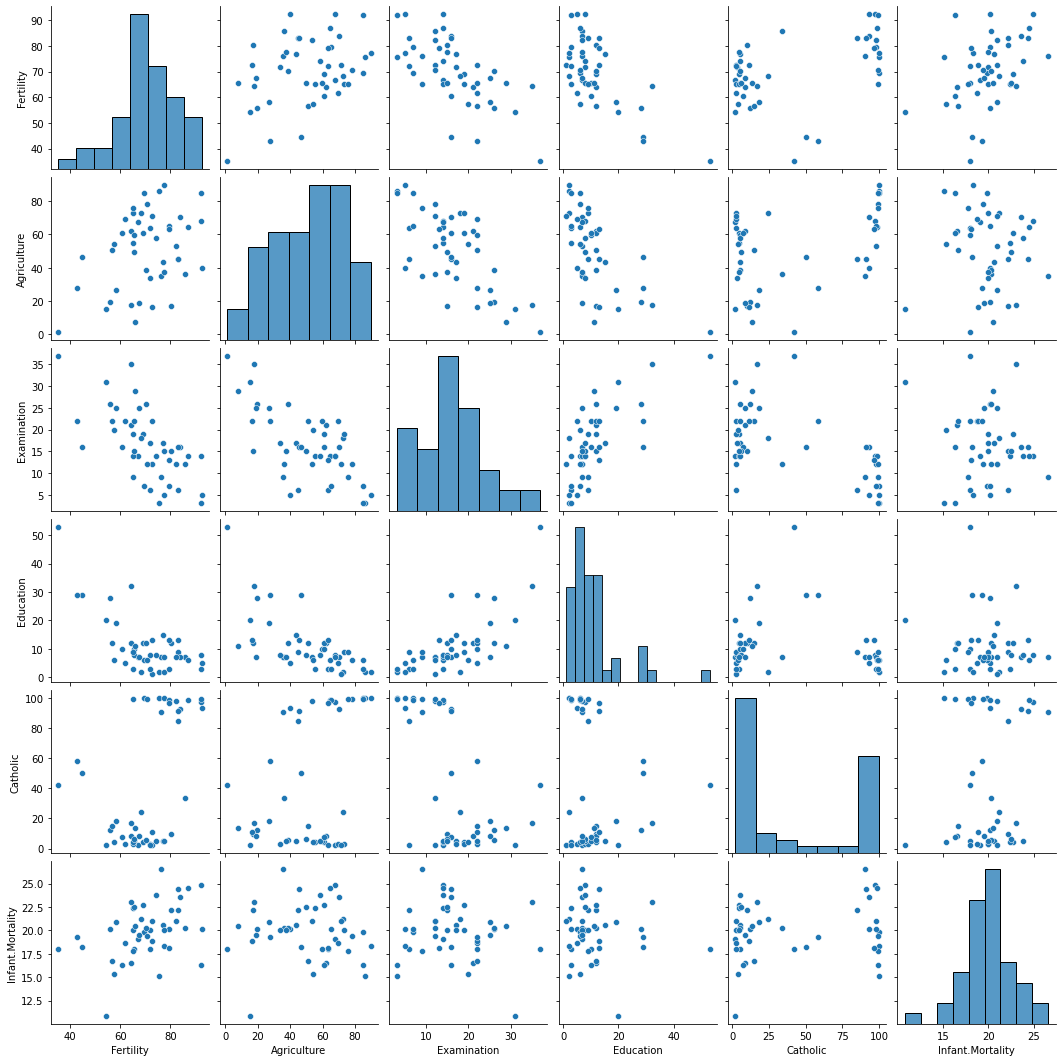

In [26]:
sns.pairplot(df)

### Using z-score

### Exponential Tails of the Normal Distribution
| Range | Expected Fraction of Population Inside Range | Approximate Expected Frequency Outside Range | Approximate frequency for daily event |
| ----- | -------------------------------------------- | -------------------------------------------- | -------------------------------------------- |
| μ ± 0.5σ | 0.382924922548026                            | 2 in 3 |Four or five times a week|
| μ ± σ | 0.682689492137086 | 1 in 3 |Twice a week|
| μ ± 1.5σ | 0.866385597462284 | 1 in 7 |Weekly|
| μ ± 2σ | 0.954499736103642 | 1 in 22 |Every three weeks|
| μ ± 2.5σ | 0.987580669348448 | 1 in 81 |Quarterly|
| μ ± 3σ | 0.997300203936740 | 1 in 370 |Yearly|
| μ ± 3.5σ | 0.999534741841929 | 1 in 2149 |Every 6 years|
| μ ± 4σ | 0.999936657516334 | 1 in 15,787 |Every 43 years|
| μ ± 4.5σ | 0.999993204653751 | 1 in 147,160 |Every 403 years|
| μ ± 5σ | 0.999999426696856 | 1 in 744,278 |Every 4776 years|
| μ ± 5.5σ | 0.999999962020875 | 1 in 26,330,254 |Every 72,090 years|
| μ ± 6σ | 0.999999998026825 | 1 in 506,797,346 |Every 1.38 million years|

### Using IQR

In [27]:
# steps to defining IQR/Tukey method:
# get the Q1 and Q3 values
# determine our multiplier
# use these qualities to assert abnormalities

In [28]:
multiplier = 1.5
q1 = df.Examination.quantile(0.25)
q3 = df.Examination.quantile(0.75)

In [29]:
q1

12.0

In [30]:
iqr = q3 - q1

In [31]:
iqr

10.0

In [32]:
inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

In [34]:
df[(df['Examination'] < inner_lower_fence) | (df['Examination'] > inner_upper_fence)]

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality


In [35]:
# z-score:
# subtract the data point from the mean, divide by the standard deviation

In [37]:
z_scores = pd.Series((df['Infant.Mortality'] - df['Infant.Mortality'].mean()) / df['Infant.Mortality'].std())

In [39]:
df['inf_mort_zs'] = z_scores

In [40]:
df[df['inf_mort_zs'].abs() >= 2]

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,inf_mort_zs
Porrentruy,76.1,35.3,9,7,90.57,26.6,2.285664
La Vallee,54.3,15.2,31,20,2.15,10.8,-3.138862


In [41]:
multiplier = 1.5
q1 = df['Infant.Mortality'].quantile(0.25)
q3 = df['Infant.Mortality'].quantile(0.75)

In [42]:
iqr = q3 - q1

In [43]:
inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

In [44]:
df[(df['Infant.Mortality'] < inner_lower_fence) | (df['Infant.Mortality'] > inner_upper_fence)]

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,inf_mort_zs
La Vallee,54.3,15.2,31,20,2.15,10.8,-3.138862
